In [5]:
import matplotlib.pyplot as plt
from KMeans import *

## Lire l'image

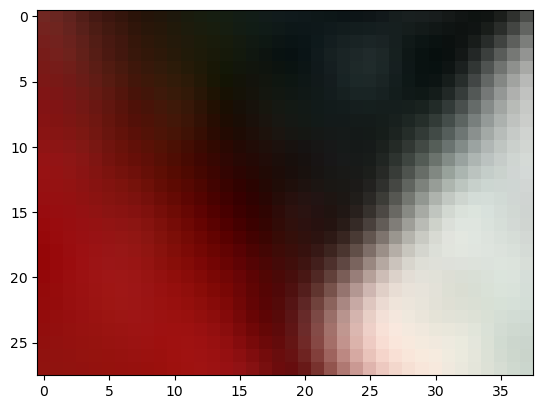

In [2]:
nom_image = "src/logo_cropped2.png"
im = plt.imread(nom_image)[: ,: ,:3] #on garde que les
#3 premieres composantes , la transparence est inutile
im_h, im_l , _ = im.shape

pixels = im.reshape((im_h*im_l ,3)) #transformation en matrice n*3, n nombre de pixels
imnew = pixels.reshape((im_h,im_l ,3)) #transformation inverse

plt.imshow(im) 


## Compression

In [3]:
def compresser(pixels, km):
    pixels2 = []
    
    for point in pixels:
        pixels2.append(km.transform(point))
    pixels2 = np.array(pixels2)
    imnew = pixels2.reshape((im_h,im_l ,3)) #transformation inverse
    plt.imshow(imnew)
    
    return pixels2

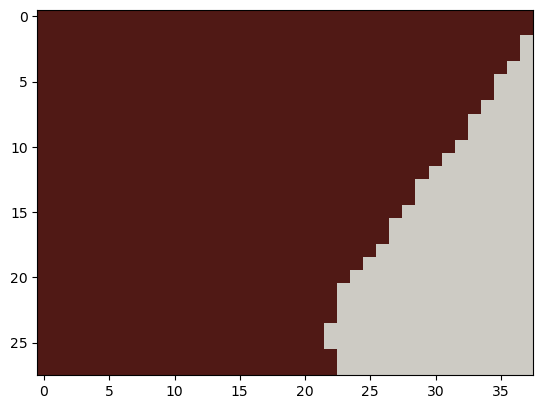

In [6]:
km2 = KMeans(2, pixels)
km2.fit()

pixels2 = compresser(pixels, km2)

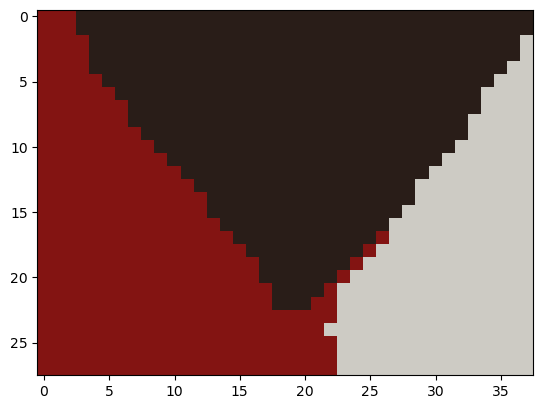

In [11]:
km3 = KMeans(3, pixels)
km3.fit()
pixels3 = compresser(pixels, km3)

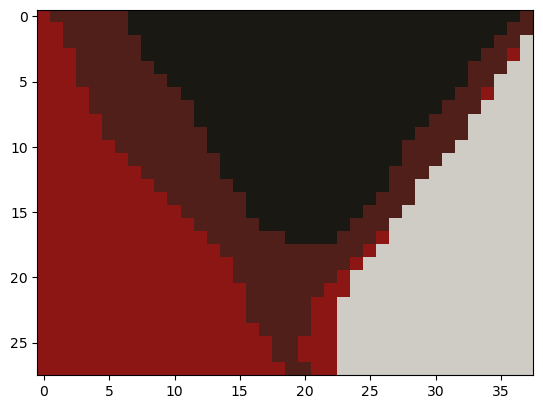

In [12]:
km3 = KMeans(4, pixels)
km3.fit()
pixels4 = compresser(pixels, km3)

## Afficher l'erreur

In [13]:
def distance_intra_cluster(pixels, pixels2):
    return np.sum((pixels-pixels2)**2)/pixels.shape[0]

couts = []

In [16]:
couts.append(distance_intra_cluster(pixels, pixels2))
couts.append(distance_intra_cluster(pixels, pixels3))
couts.append(distance_intra_cluster(pixels, pixels4))

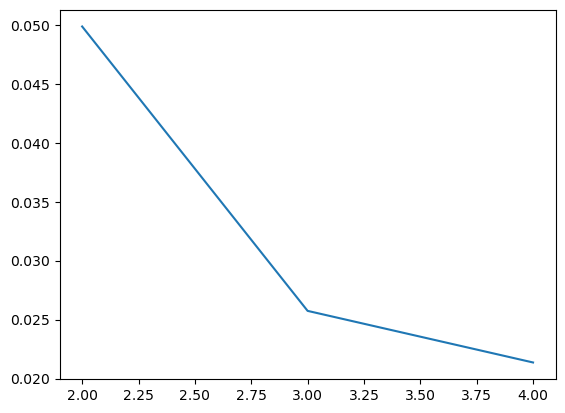

In [17]:
plt.plot([2, 3, 4], couts)

## Partie tout-en-un

In [36]:
nom_image = "logo_cropped2.png"

def img_to_pixels(nom_image:str):
    im = plt.imread(nom_image)[: ,: ,:3] #on garde que les
    #3 premieres composantes , la transparence est inutile
    im_h, im_l , _ = im.shape

    pixels = im.reshape((im_h*im_l ,3))
    return pixels

def compresser_pixels(pixels, km):
    pixels_compresses = []
    
    for point in pixels:
        pixels_compresses.append(km.transform(point))
    pixels_compresses = np.array(pixels_compresses)
    return pixels_compresses

def compresser_image(nom_image:str, K:int):    
    pixels = img_to_pixels(nom_image)
    
    km = KMeans(K, pixels)
    km.fit()
    
    pixels_compresses = compresser_pixels(pixels, km)
    
    imnew = pixels_compresses.reshape((im_h,im_l ,3)) #transformation inverse
    plt.imshow(imnew)
    plt.savefig("./figures/"+nom_image+str(K)+".jpg")
    
    cout = distance_intra_cluster(pixels, pixels_compresses)
    
    return pixels_compresses, cout


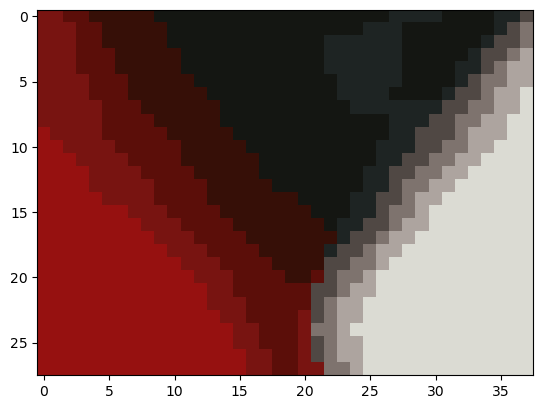

In [37]:
couts = []
K_range = range(2,11)
for i in K_range:
    pixels_compresses, cout = compresser_image("logo_cropped2.png", i)
    couts.append(cout)

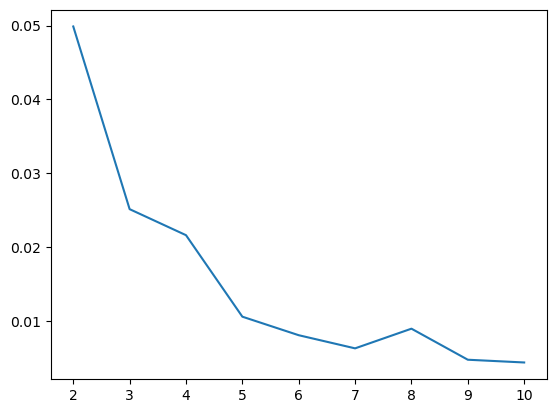

In [38]:
plt.plot(K_range, couts)